## Checking Tensorflow

In [35]:
import tensorflow as tf
tf.__version__

'2.10.0'

## Importing all the required Libraries

In [36]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Reading the Data from the .csv File
-----Source: Prognostics Center of Excellence at Ames Research
Center, NASA

In [37]:
dataset = pd.read_csv('B0005.csv')
dataset = dataset.drop(labels=['SampleId'], axis=1)

In [38]:
print( 'Shape of DataFrame: {}'.format(dataset.shape))
print (dataset.loc[1])

Shape of DataFrame: (636, 6)
Cycle                      0.000000
Time Measured(Sec)      3690.234000
Voltage Measured(V)        2.475768
Current Measured          -2.009436
Temperature Measured      39.162987
Capacity(Ah)               2.035338
Name: 1, dtype: float64


In [39]:
dataset.loc[280:]

,Cycle,Time Measured(Sec),Voltage Measured(V),Current Measured,Temperature Measured,Capacity(Ah)
280,70,3148.829,3.484004,-0.000984,36.466500,1.622125
281,70,3148.829,3.468023,-0.001288,34.587894,1.530157
282,70,3148.829,3.238140,-0.000266,39.408643,1.667437
283,70,3045.187,3.414321,0.005711,34.697069,1.533426
284,71,3149.094,3.508463,-0.003644,36.017069,1.611326
...,...,...,...,...,...,...
631,166,2802.016,3.693059,-0.001245,32.371097,1.174975
632,166,2802.016,3.372148,-0.001992,38.470677,1.421787
633,167,2820.390,3.589937,-0.000583,34.405920,1.325079
634,167,2820.390,3.691809,-0.003127,32.192324,1.185675


In [40]:
data = dataset[~dataset.isin(['?'])]
data.loc[280:]

,Cycle,Time Measured(Sec),Voltage Measured(V),Current Measured,Temperature Measured,Capacity(Ah)
280,70,3148.829,3.484004,-0.000984,36.466500,1.622125
281,70,3148.829,3.468023,-0.001288,34.587894,1.530157
282,70,3148.829,3.238140,-0.000266,39.408643,1.667437
283,70,3045.187,3.414321,0.005711,34.697069,1.533426
284,71,3149.094,3.508463,-0.003644,36.017069,1.611326
...,...,...,...,...,...,...
631,166,2802.016,3.693059,-0.001245,32.371097,1.174975
632,166,2802.016,3.372148,-0.001992,38.470677,1.421787
633,167,2820.390,3.589937,-0.000583,34.405920,1.325079
634,167,2820.390,3.691809,-0.003127,32.192324,1.185675


In [41]:
data = data.dropna(axis=0)
data.loc[280:]

,Cycle,Time Measured(Sec),Voltage Measured(V),Current Measured,Temperature Measured,Capacity(Ah)
280,70,3148.829,3.484004,-0.000984,36.466500,1.622125
281,70,3148.829,3.468023,-0.001288,34.587894,1.530157
282,70,3148.829,3.238140,-0.000266,39.408643,1.667437
283,70,3045.187,3.414321,0.005711,34.697069,1.533426
284,71,3149.094,3.508463,-0.003644,36.017069,1.611326
...,...,...,...,...,...,...
631,166,2802.016,3.693059,-0.001245,32.371097,1.174975
632,166,2802.016,3.372148,-0.001992,38.470677,1.421787
633,167,2820.390,3.589937,-0.000583,34.405920,1.325079
634,167,2820.390,3.691809,-0.003127,32.192324,1.185675


In [42]:
print(data.shape)
print(data.dtypes)

(636, 6)
Cycle                     int64
Time Measured(Sec)      float64
Voltage Measured(V)     float64
Current Measured        float64
Temperature Measured    float64
Capacity(Ah)            float64
dtype: object


In [43]:
data.keys()
data.shape

(636, 6)

In [44]:
data = data.apply(pd.to_numeric)
data.dtypes

Cycle                     int64
Time Measured(Sec)      float64
Voltage Measured(V)     float64
Current Measured        float64
Temperature Measured    float64
Capacity(Ah)            float64
dtype: object

In [45]:
data.describe()

,Cycle,Time Measured(Sec),Voltage Measured(V),Current Measured,Temperature Measured,Capacity(Ah)
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,79.764151,3116.977701,3.297086,-0.171153,36.318064,1.581652
std,47.137103,242.197224,0.382406,0.556974,2.090171,0.198765
min,0.000000,2742.843000,1.813269,-2.012015,32.113473,1.153818
25%,39.000000,2891.996250,3.260587,-0.003576,34.639503,1.421123
50%,79.000000,3084.281000,3.397571,-0.001903,35.808964,1.559695
75%,119.000000,3311.828000,3.529257,-0.000338,38.447301,1.763486
max,167.000000,3690.234000,3.697170,0.009113,41.049942,2.035338


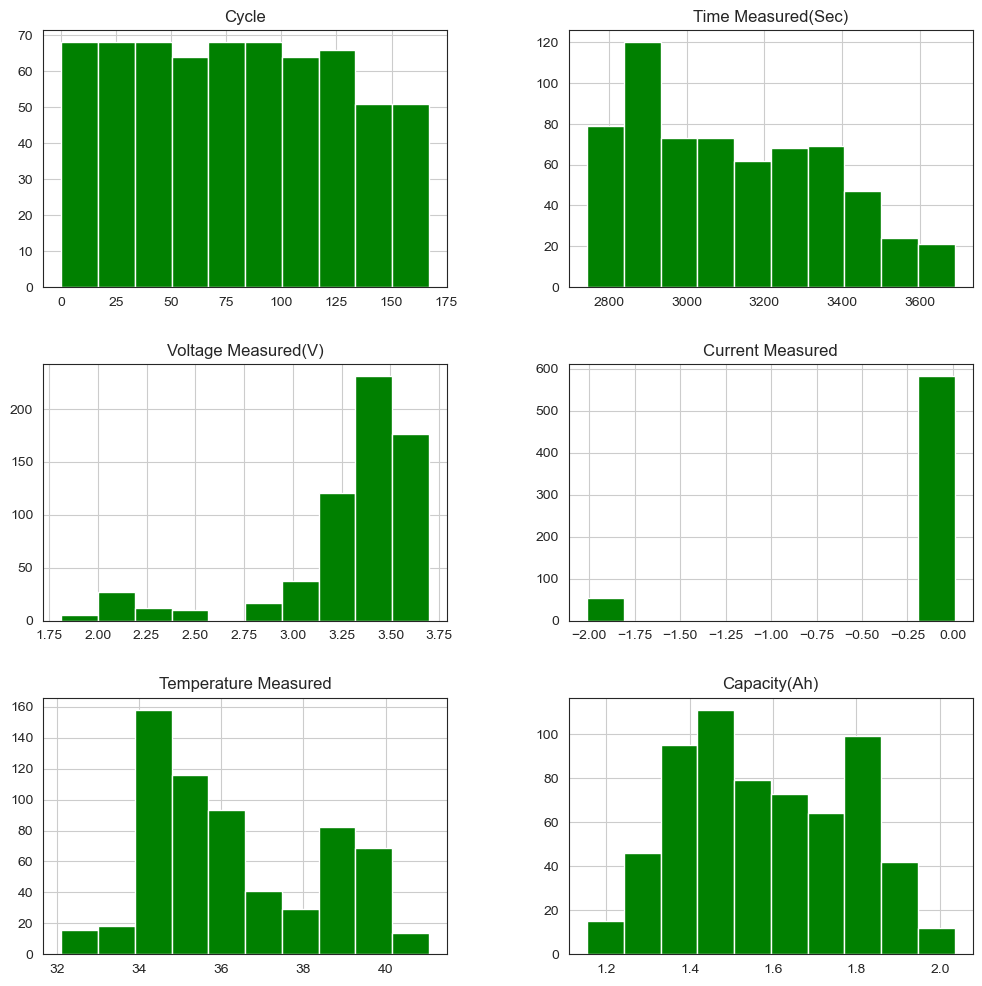

In [46]:
data.hist(figsize = (12, 12), color="green")
plt.show()

<AxesSubplot: title={'center': 'Features Standard Deviation'}>

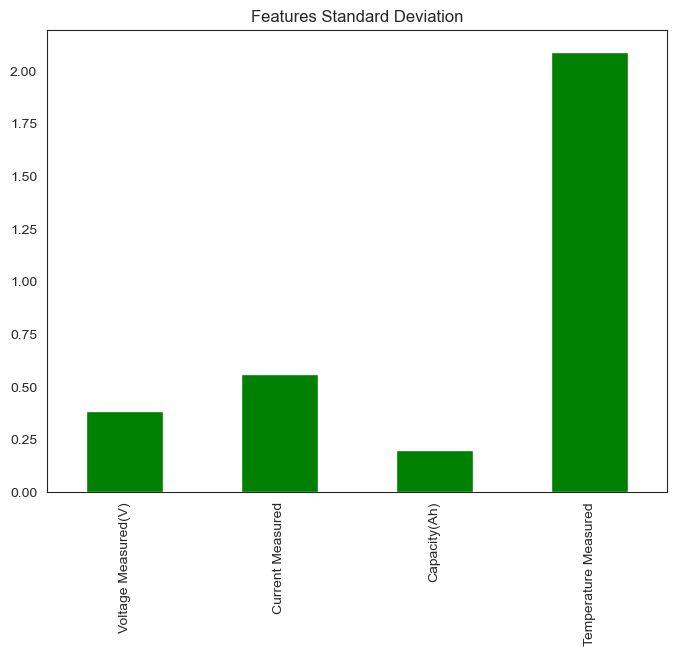

In [47]:
features=["Voltage Measured(V)","Current Measured","Capacity(Ah)","Temperature Measured"]
data[features].std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation", color="g")


In [48]:
X = np.array(data.iloc[:,0:5].values)
y = np.array(data.iloc[:,5].values)

In [49]:
X,y

(array([[ 0.00000000e+00,  3.69023400e+03,  3.27716998e+00,
         -6.52835100e-03,  3.42308528e+01],
        [ 0.00000000e+00,  3.69023400e+03,  2.47576776e+00,
         -2.00943589e+00,  3.91629865e+01],
        [ 0.00000000e+00,  3.69023400e+03,  3.06211271e+00,
         -1.43329900e-03,  3.73384785e+01],
        ...,
        [ 1.67000000e+02,  2.82039000e+03,  3.58993739e+00,
         -5.83347000e-04,  3.44059205e+01],
        [ 1.67000000e+02,  2.82039000e+03,  3.69180898e+00,
         -3.12712900e-03,  3.21923241e+01],
        [ 1.67000000e+02,  2.82039000e+03,  3.38385665e+00,
         -9.84538000e-04,  3.78516025e+01]]),
 array([1.85648742, 2.03533759, 1.89105229, 1.85500452, 1.84632725,
        2.02514025, 1.88063703, 1.84319553, 1.83534919, 2.01332637,
        1.88066267, 1.83960184, 1.83526253, 2.01328467, 1.8807709 ,
        1.8306736 , 1.83464551, 2.00052834, 1.87945087, 1.83270021,
        1.83566166, 2.01389908, 1.88070035, 1.82852889, 1.83514614,
        2.01310111, 1

In [50]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [51]:
mean, std

(array([ 7.97641509e+01,  3.11697770e+03,  3.29708625e+00, -1.71153296e-01,
         3.63180645e+01]),
 array([ 47.10003109, 242.00674287,   0.38210518,   0.55653546,
          2.08852755]))

In [52]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.3)

In [53]:
X_test.shape

(191, 5)

In [54]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(445, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [55]:
X_train[0]

array([ 0.06870163, -0.12955301,  0.0497592 ,  0.30729039,  1.381131  ])

In [97]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=5, kernel_initializer='uniform', activation='tanh'))
    model.add(Dropout(0.15))
    model.add(Dense(7, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(3,kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(lr=0.001), metrics=['mean_absolute_error','accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                60        
                                                                 
 dropout_8 (Dropout)         (None, 10)                0         
                                                                 
 dense_13 (Dense)            (None, 7)                 77        
                                                                 
 dropout_9 (Dropout)         (None, 7)                 0         
                                                                 
 dense_14 (Dense)            (None, 3)                 24        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
None


/Users/noct.kun/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [98]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=10, batch_size=1)

Epoch 1/10


2023-03-11 15:14:35.614918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


441/445 [============================>.] - ETA: 0s - loss: 0.0935 - mean_absolute_error: 0.2488 - accuracy: 0.9841

2023-03-11 15:14:38.136125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


445/445 [==============================] - 3s 6ms/step - loss: 0.0929 - mean_absolute_error: 0.2475 - accuracy: 0.9843 - val_loss: 0.0167 - val_mean_absolute_error: 0.1058 - val_accuracy: 0.9948
Epoch 2/10
445/445 [==============================] - 3s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0485 - accuracy: 0.9865 - val_loss: 0.0076 - val_mean_absolute_error: 0.0604 - val_accuracy: 0.9948
Epoch 3/10
445/445 [==============================] - 3s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0306 - accuracy: 0.9865 - val_loss: 0.0058 - val_mean_absolute_error: 0.0465 - val_accuracy: 0.9948
Epoch 4/10
445/445 [==============================] - 3s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0261 - accuracy: 0.9865 - val_loss: 0.0051 - val_mean_absolute_error: 0.0393 - val_accuracy: 0.9948
Epoch 5/10
445/445 [==============================] - 3s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0226 - accuracy: 0.9865 - val_loss: 0.0049 - val_mean_absolute_error: 0.0354 - va

In [99]:
history.history

{'loss': [0.0929366797208786,
  0.010003953240811825,
  0.0081332353875041,
  0.007853945717215538,
  0.007767621893435717,
  0.007721321657299995,
  0.007622221484780312,
  0.007450931239873171,
  0.007371673360466957,
  0.007296914700418711],
 'mean_absolute_error': [0.24753372371196747,
  0.04852360114455223,
  0.03061790019273758,
  0.02609468810260296,
  0.02261343039572239,
  0.022285660728812218,
  0.02105814777314663,
  0.02128295972943306,
  0.018065469339489937,
  0.019542261958122253],
 'accuracy': [0.9842696785926819,
  0.9865168929100037,
  0.9865168929100037,
  0.9865168929100037,
  0.9865168929100037,
  0.9865168929100037,
  0.9865168929100037,
  0.9865168929100037,
  0.9865168929100037,
  0.9865168929100037],
 'val_loss': [0.016667239367961884,
  0.007564166095107794,
  0.00584162725135684,
  0.005147681105881929,
  0.004943236242979765,
  0.004629008937627077,
  0.004486164543777704,
  0.004172242246568203,
  0.00471458537504077,
  0.004367464687675238],
 'val_mean_abs

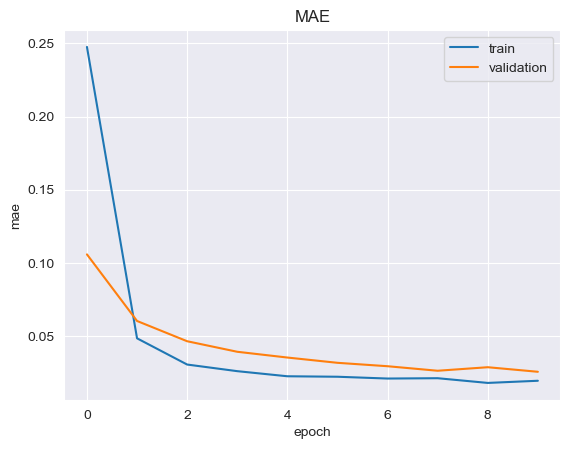

In [100]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

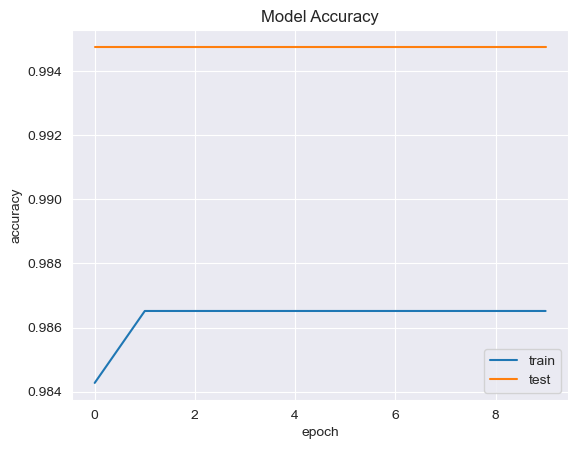

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

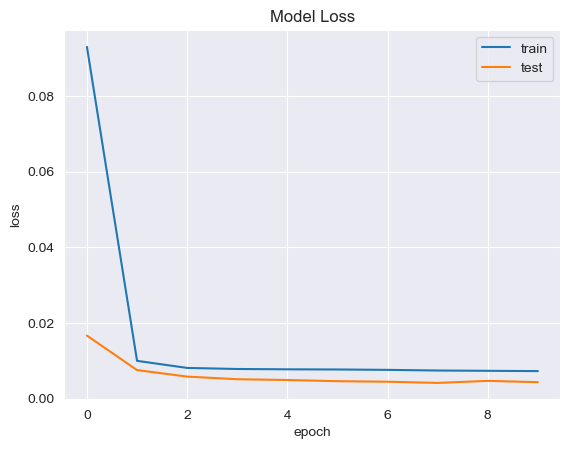

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Text(0.5, 1.0, 'RUL Prediction')

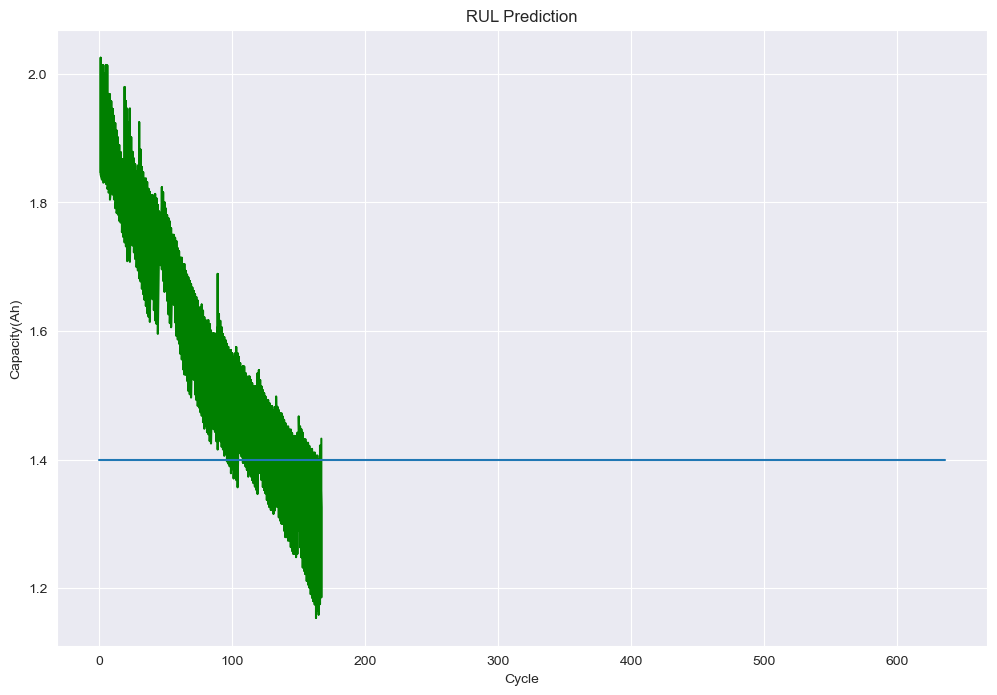

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = data.loc[(data['Cycle']>=1),['Cycle','Capacity(Ah)']]
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(plot_df['Cycle'], plot_df['Capacity(Ah)'],color="green")
#Draw threshold
plt.plot([0.,len(data)], [1.4, 1.4])
plt.ylabel('Capacity(Ah)')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Cycle')
plt.title('RUL Prediction')

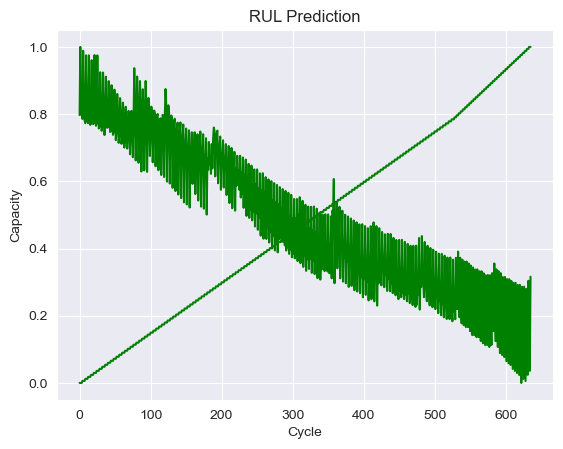

(array([68., 68., 68., 64., 68., 68., 64., 66., 51., 51.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

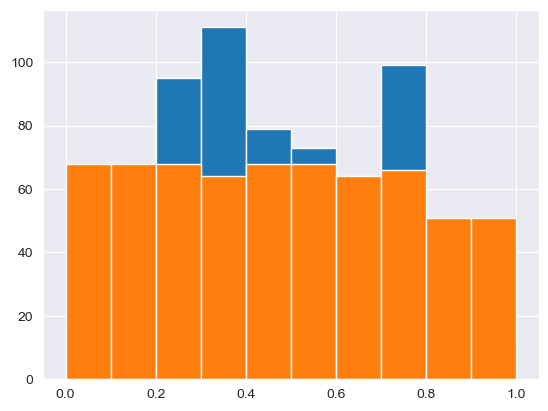

In [104]:
capacity = np.array(data.iloc[:,5].values)
cycle = np.array(data.iloc[:,0].values)
normalizedCycle = (cycle-min(cycle))/(max(cycle)-min(cycle))
normalizedCapacity = (capacity-min(capacity)) / (max(capacity) - min(capacity))
plt.plot(normalizedCapacity, color="green")
plt.plot(normalizedCycle, color="green")
plt.title('RUL Prediction')
plt.ylabel('Capacity')
plt.xlabel('Cycle')
plt.show()
plt.hist(normalizedCapacity, bins=10)
plt.hist(normalizedCycle, bins=10)


Text(0.5, 1.0, 'Discharge')

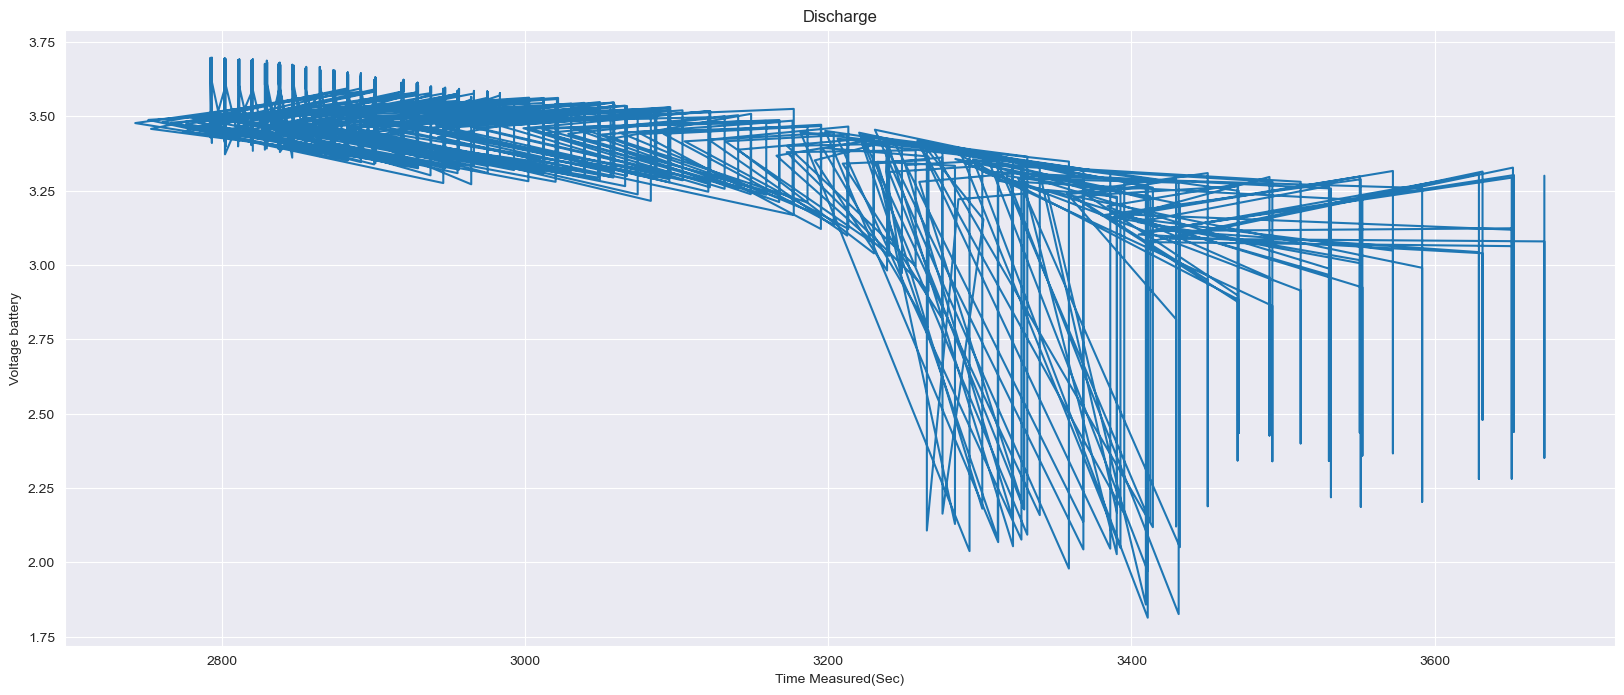

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = data.loc[(data['Cycle']>=1),['Time Measured(Sec)','Voltage Measured(V)']]
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['Time Measured(Sec)'], plot_df['Voltage Measured(V)'])
plt.ylabel('Voltage battery')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
#adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Time Measured(Sec)')
plt.title('Discharge')

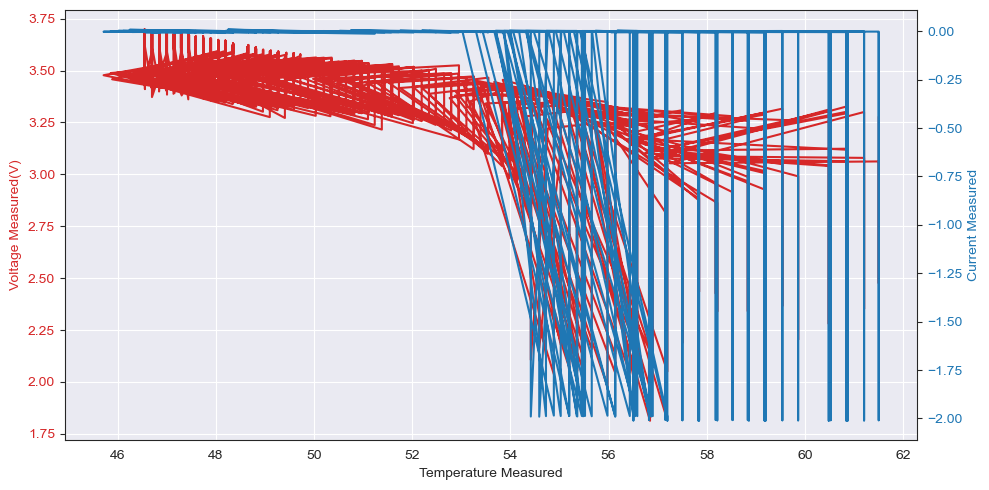

In [106]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax1 = plt.subplots()
sns.set_style("white")
plot_df= data.loc[(data['Cycle']==1),['Temperature Measured','Current Measured']]
#plt.plot([126, 127], color="black")
plot_df1 = data.loc[(data['Cycle']==1),['Temperature Measured','Voltage Measured(V)']]

color = 'tab:red'
ax1.set_xlabel('Temperature Measured')
ax1.set_ylabel('Voltage Measured(V)', color=color)
ax1.plot(data['Time Measured(Sec)']/60, data['Voltage Measured(V)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Current Measured', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Time Measured(Sec)']/60, data['Current Measured'],'-', color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.set_size_inches(10, 5)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
# vertical black line split the graph between charge and discharge operation.

In [ ]:
plt.show()